In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ena(bacia):

    df_ena = pd.read_excel('./enas_separadas.xlsx', sheet_name=bacia, header=None, index_col=0)
    df_ena_clim=pd.read_csv('./climatologia_ena.csv', sep=';', index_col=0).T
    df_ena_anom = df_ena - df_ena_clim[bacia].values
    
    df_ena_anom = pd.concat([df_ena_anom.loc[i] for i in df_ena.index])
    df_ena_anom.index = pd.date_range(start='1/1/1931', end='12/31/2021', freq='M')
    df_ena_anom = pd.DataFrame(df_ena_anom)
    df_ena_anom.columns = ['ENA MWmed']
    df_ena_anom = df_ena_anom[df_ena_anom.index >= '1950-01-01']
    
    df_oni = pd.read_table('https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/detrend.nino34.ascii.txt', delim_whitespace=True)
    df_oni = df_oni[df_oni['YR'] <= 2021]
    df_oni = pd.DataFrame(df_oni['ANOM'])
    df_oni.index = df_ena_anom.index
    df_oni['ENA'] = df_ena_anom.values
    
    df_total = df_oni

    return df_total

In [34]:
def gera_graf_limiar(liminf, limsup, bacia, plot):
    df = ena(bacia)
    df = (df[(df['ANOM'] >= liminf) & (df['ANOM'] < limsup)])
    ena_medio = round(df['ENA'].mean(),1)
    if plot == True:
        normalized_df=df/df.max()
        normalized_df.index = normalized_df.index.strftime('%b\n%Y')
        normalized_df.columns = ['Anom ONI', 'Anom ENA']
        normalized_df.plot(kind='bar', figsize=(20,10))
        corr = round(normalized_df.corr()['Anom ENA']['Anom ONI'], 2)
        plt.xticks(rotation = 0, size=10) 
        plt.yticks(rotation = 0, size=10) 
        plt.grid(ls='--',lw=0.3)
        plt.ylim(normalized_df.min().min()-0.5, normalized_df.max().max()+0.5)
        plt.title(f'Anomalias normalizadas de ENA e com anomalias de ONI entre {liminf} e {limsup}', size=13, style='italic', loc='left')
        plt.title(f'Valor médio da Anom. de ENA no período = {ena_medio} | Correlação = {corr} | Bacia do rio {bacia}' , loc='right', size=13)
        #plt.savefig(f'./figuras/{bacia}.png')
    return 

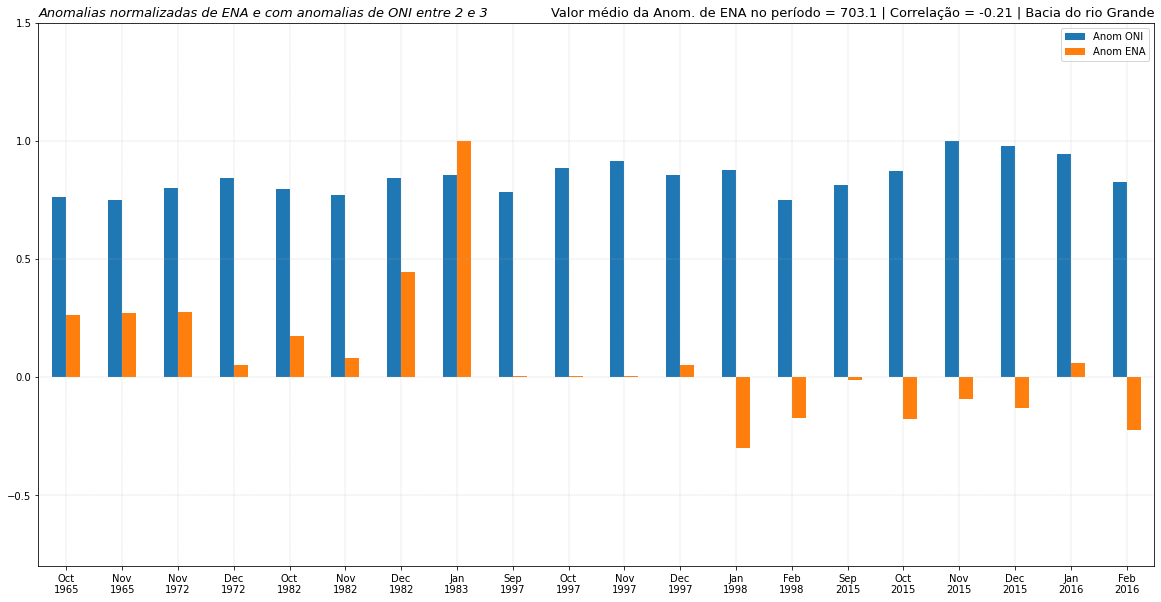

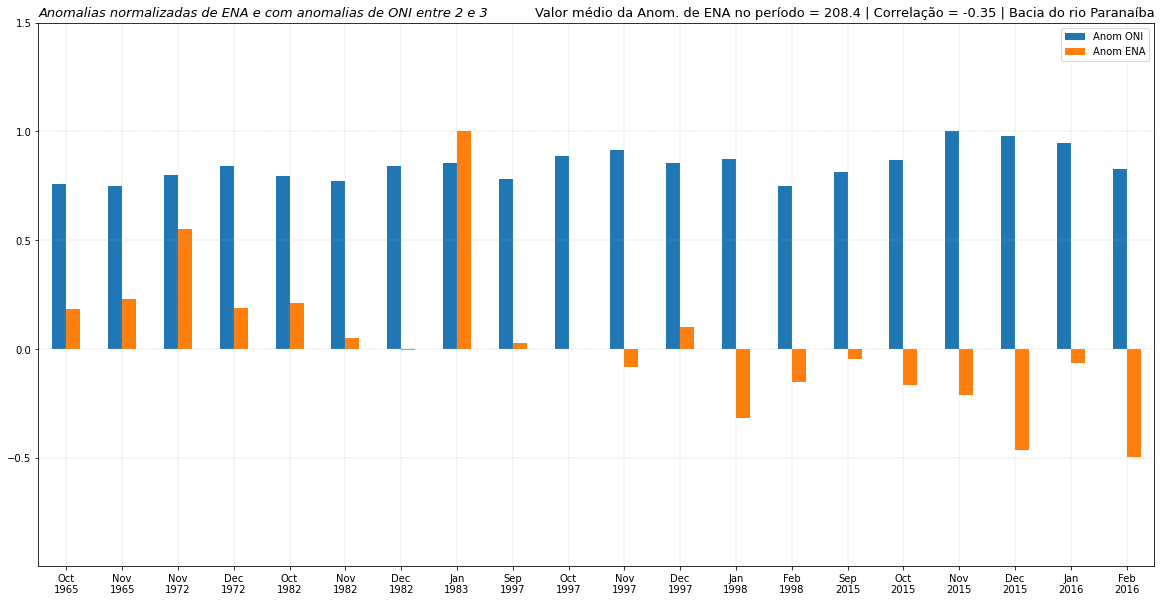

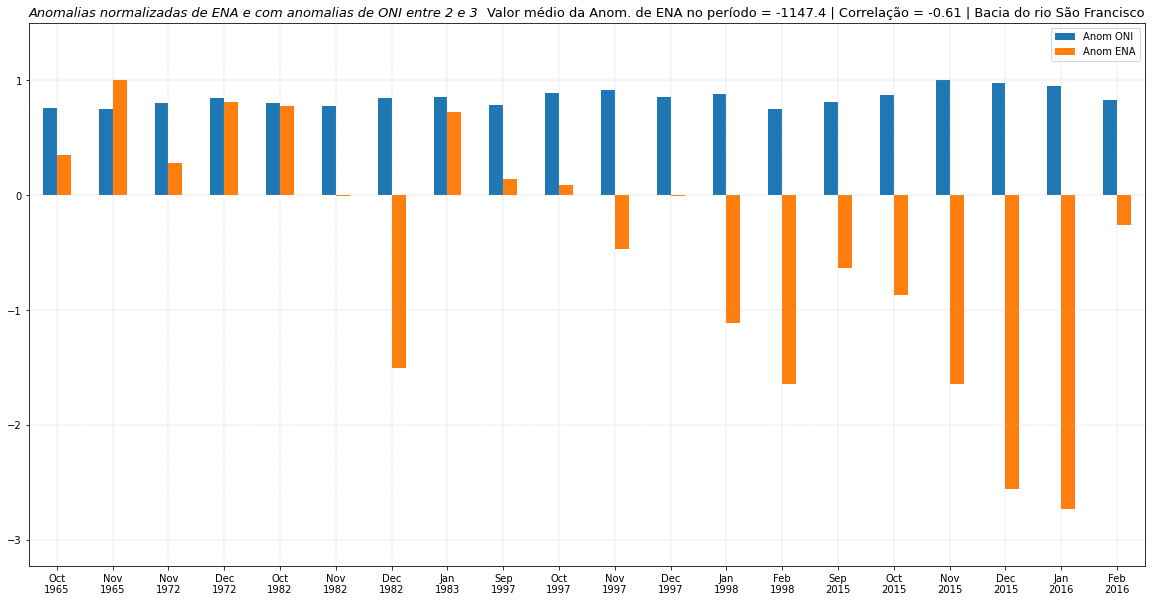

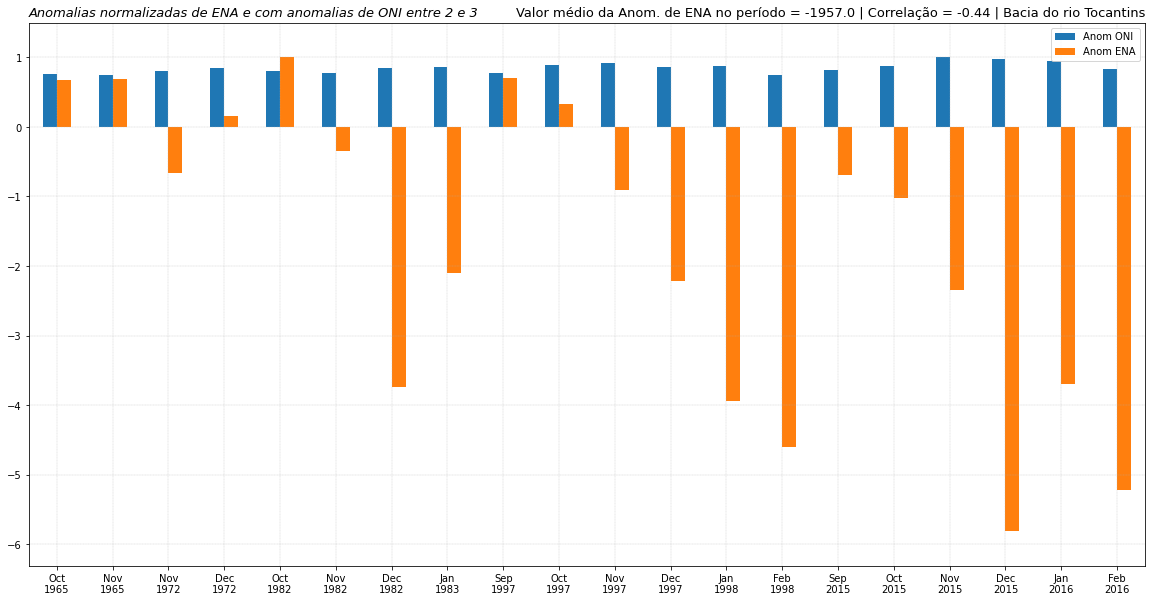

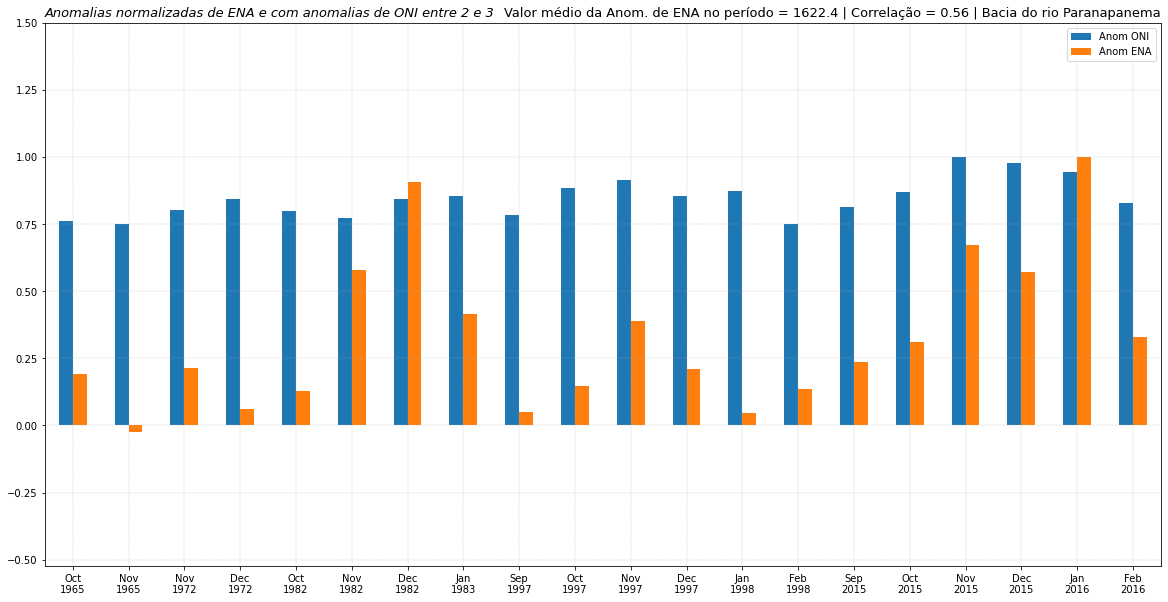

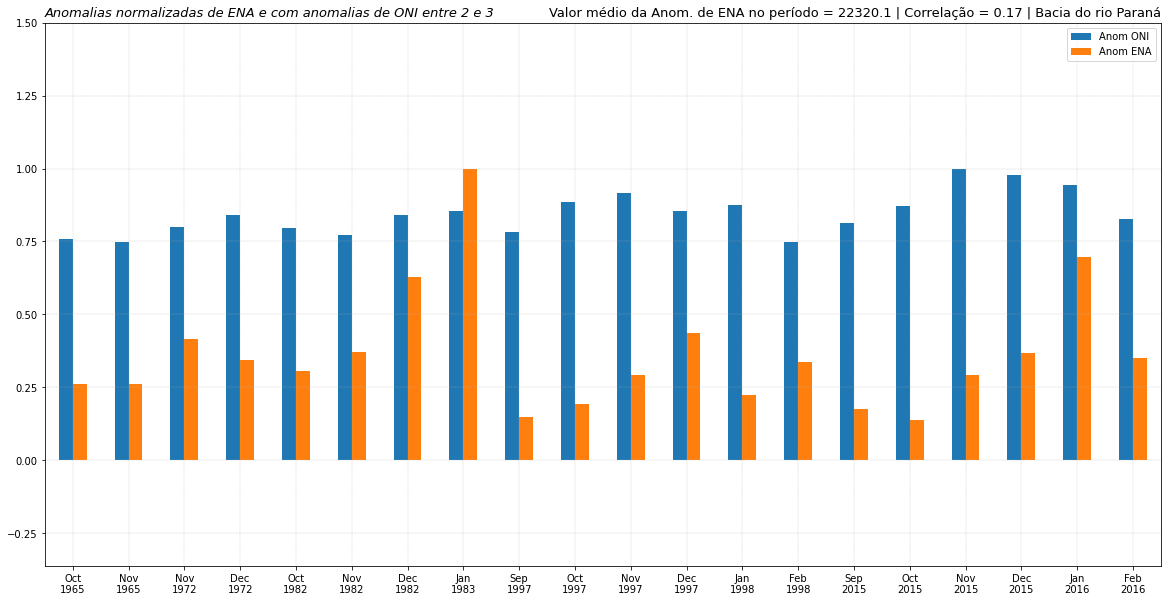

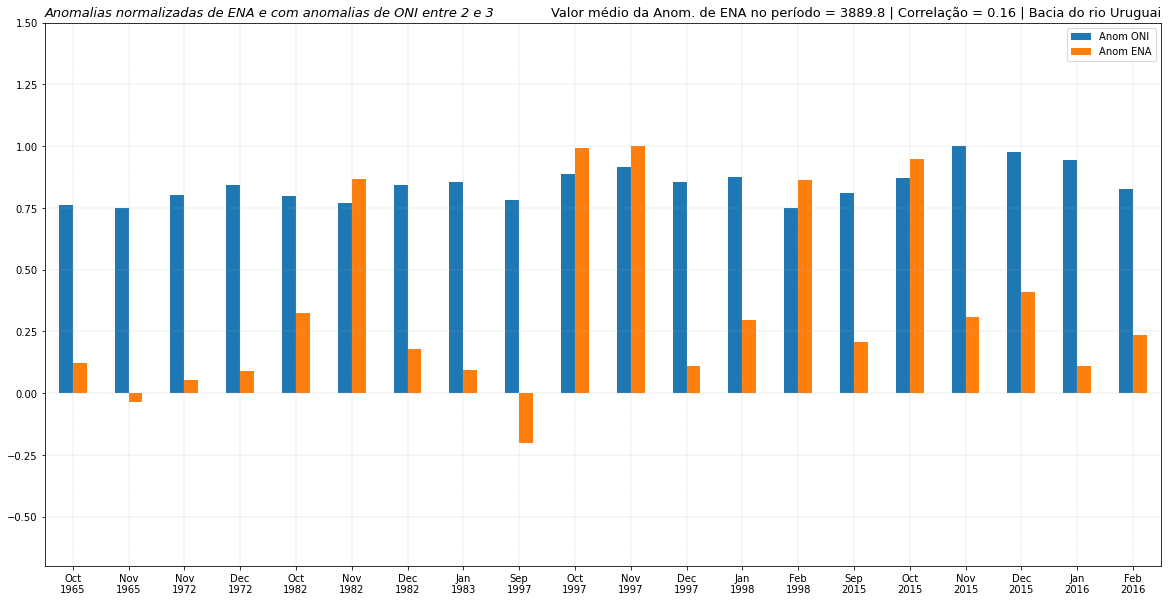

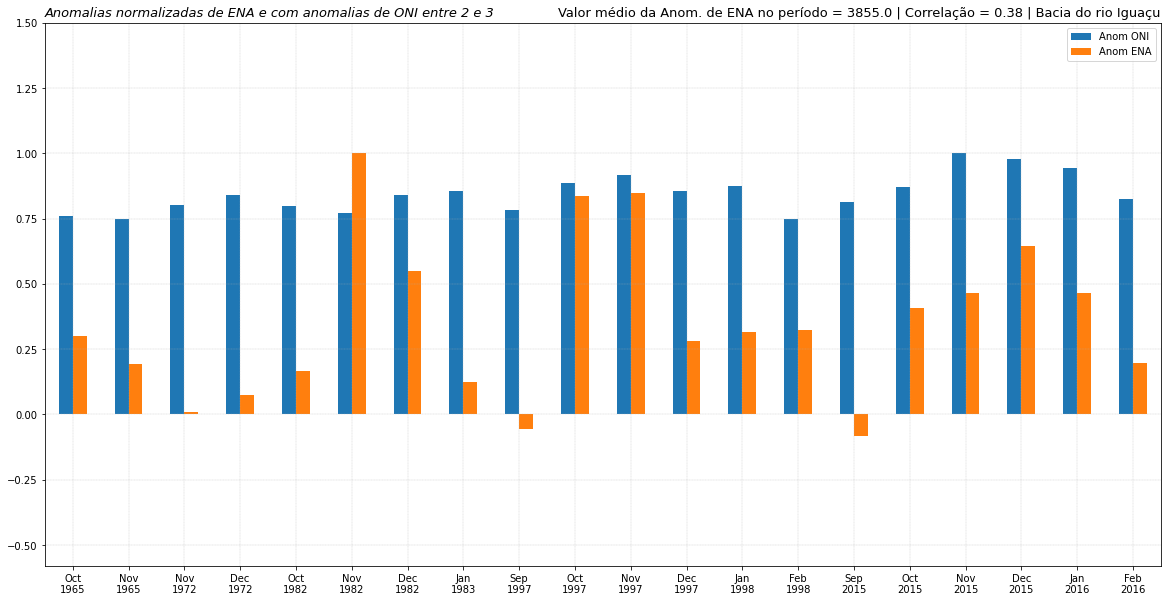

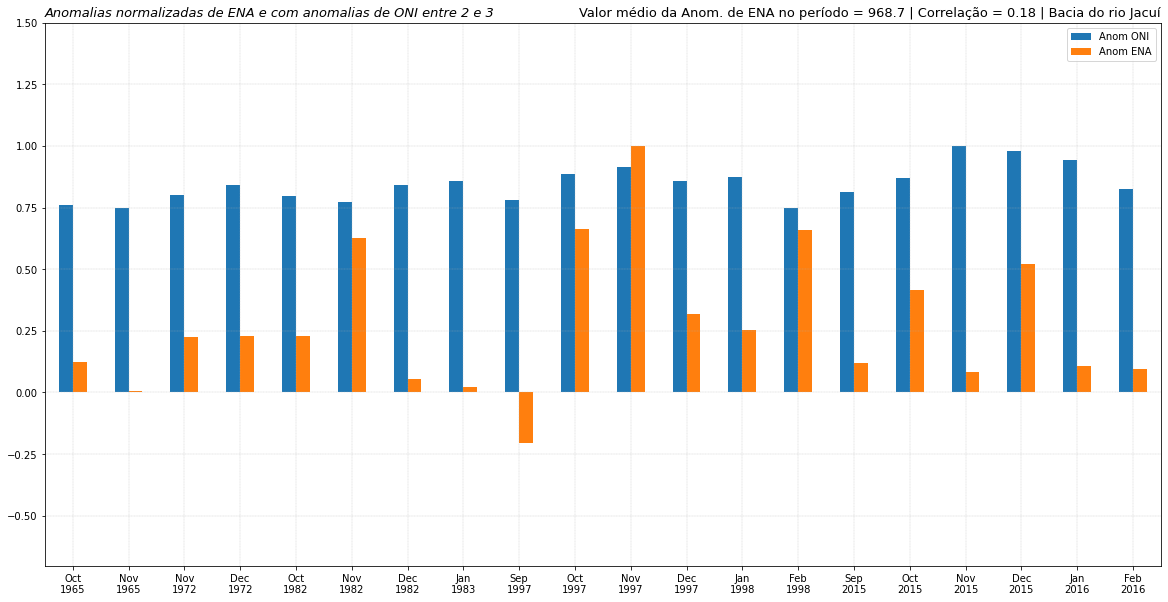

In [35]:
mean_total = []
for bac in ['Grande', 'Paranaíba', 'São Francisco', 'Tocantins', 'Paranapanema', 'Paraná', 'Uruguai', 'Iguaçu', 'Jacuí']:
    mean_total.append(gera_graf_limiar(2, 3, bac, True))